In [1]:
from ebpy.GLMixture import GLMixture, mvn_pdf

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
np.random.seed(1234567891)

n,p = 1000,2#1000,2

ang = 2*np.pi*np.random.rand(n)
truth = 2*np.array([np.cos(ang), np.sin(ang)]).T
#truth = np.random.randn(n,p)
#truth = truth / np.linalg.norm(truth, axis=1)[:, np.newaxis]

l, u = .5, 1
covs = l + np.random.rand(n,p)*(u-l)
prec = 1/covs
X = truth + covs**(1/2)*np.random.randn(n,p)

In [11]:
m = GLMixture(prec_type='diagonal')

 
L = np.max(np.abs(X))

#(XX, YY) = np.meshgrid(np.linspace(-L, L, 100), np.linspace(-L, L, 100))
(XX, YY) = np.meshgrid(np.linspace(-L, L, 50), np.linspace(-L, L, 50))
atoms = np.vstack([XX.flatten(), YY.flatten()]).T

m.atoms_init = atoms

## Compute the NPMLE 
m.fit(X, prec, max_iter_em=1000)

## Denoised estimates based on empirical prior
gmleb = m.posterior_mean(X, prec)

In [4]:
o = GLMixture(prec_type='diagonal')

# n_supp = 1000
# ang = 2*np.pi*np.linspace(0, 1, n_supp)
# supp = 2*np.array([np.cos(ang), np.sin(ang)]).T

# ## Define the Oracle Prior 
# o.set_params(atoms=supp, weights=np.ones(n_supp)/n_supp)

## Define the Oracle Prior 
o.set_params(atoms=truth, weights=np.ones(n)/n)

## Denoised estimates based on oracle prior
obayes = o.posterior_mean(X, prec)

In [41]:
np.mean(np.linalg.norm(obayes-gmleb, axis=1)**2), np.mean(np.linalg.norm(obayes-truth, axis=1)**2), np.mean(np.linalg.norm(gmleb-truth, axis=1)**2), np.mean(np.linalg.norm(X-truth, axis=1)**2)

(0.0278544002672483, 0.8449388703276008, 0.8722449652167925, 1.456170751407739)

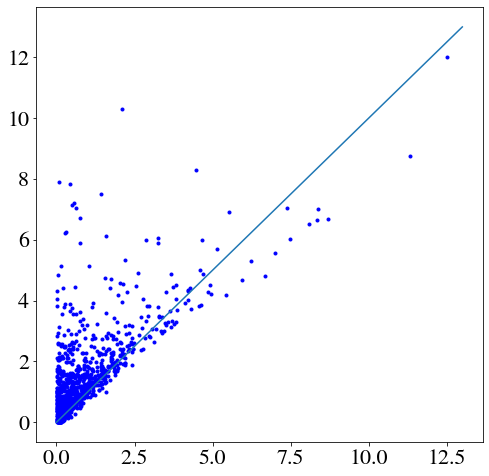

In [35]:
plt.figure(figsize=(8,8))
plt.plot(np.linalg.norm(gmleb-truth, axis=1)**2, np.linalg.norm(X-truth, axis=1)**2, 'b.')
plt.plot([0, 13],[0, 13])
plt.show()

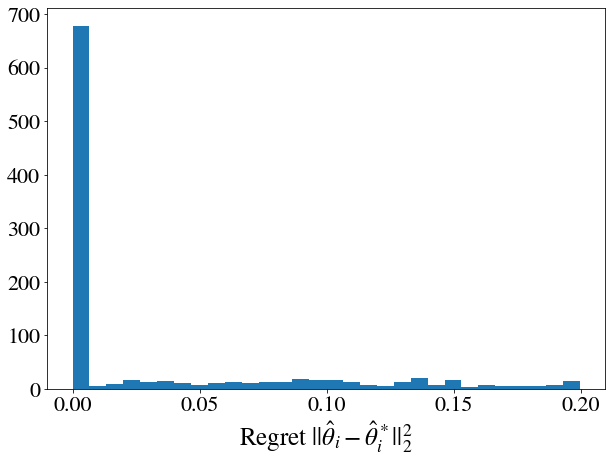

In [32]:
plt.figure(figsize=(10,7))
#plt.plot(gmleb[:,0]-obayes[:,0], gmleb[:,1]-obayes[:,1], 'k.')
err = np.linalg.norm(gmleb-obayes, axis=1)**2
plt.hist(err*(err < .2), bins=30)
plt.xlabel('Regret $\\left|\\left|\\hat\\theta_i -\\hat\\theta^*_i\\right|\\right|_2^2$', fontsize=25)
#plt.savefig('Regret_hist.png')
plt.show()

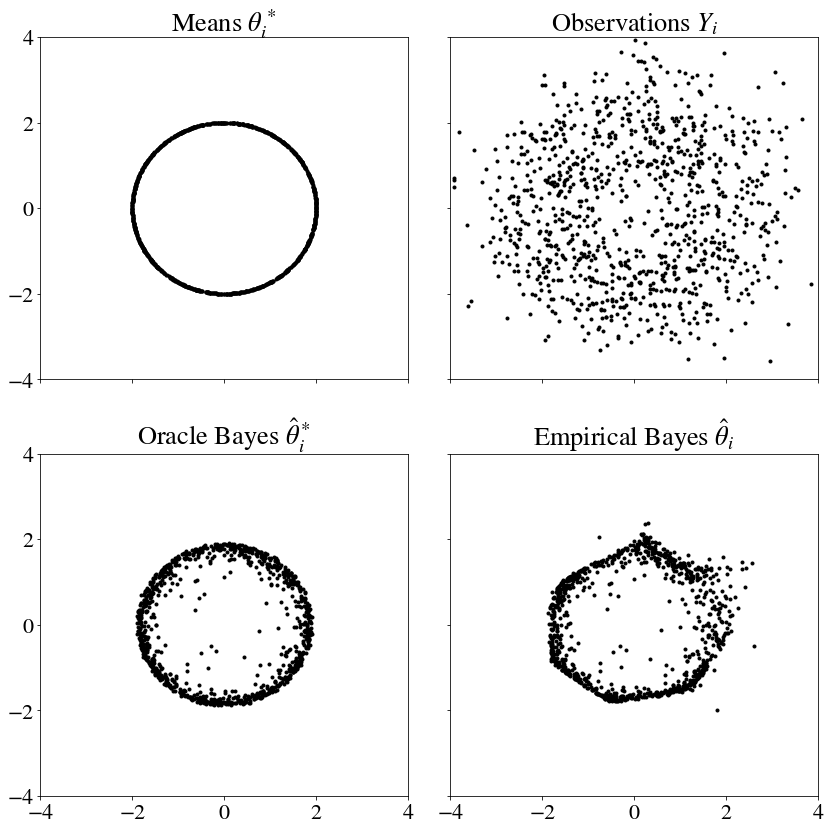

In [193]:
plt.rcParams.update({'font.size': 22,
                     'mathtext.fontset': 'stix',
                     'font.family': 'STIXGeneral'})
fig, ax = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(12,12))

ax[0,0].plot(truth[:,0], truth[:,1], 'k.')
ax[0,1].plot(X[:,0], X[:,1], 'k.')
ax[1,0].plot(obayes[:,0], obayes[:,1], 'k.')
ax[1,1].plot(gmleb[:,0], gmleb[:,1], 'k.')

M = 4
plt.xlim([-M, M])
plt.ylim([-M, M])

# ax[0,0].set_title('True Signal')
# ax[0,1].set_title('Raw Data')
# ax[1,0].set_title('Oracle Bayes')
# ax[1,1].set_title('Empirical Bayes')

ax[0,0].set_title('Means $\\theta^*_i$')
ax[0,1].set_title('Observations $Y_i$')
ax[1,0].set_title('Oracle Bayes $\\hat\\theta^*_i$')
ax[1,1].set_title('Empirical Bayes $\\hat\\theta_i$')

plt.tight_layout()
#plt.savefig('circle_demo.png', dpi=200)
plt.show()

In [97]:
k = 100#3000 # 2000
K = 2*k+1
xx = np.linspace(-4, 4, K)
yy = np.linspace(-4, 4, K)

(XX, YY) = np.meshgrid(xx, yy)
pts = np.vstack([XX.flatten(), YY.flatten()]).T

In [98]:
K = mvn_pdf(pts, m.atoms, prec[0], prec_type='diagonal', homoscedastic=True, 
            n_chunks=1, log_prob_thresh=-float('Inf'), row_condition=False)
ZZ1 = (K @ m.weights).reshape(XX.shape)

In [99]:
K = mvn_pdf(pts, o.atoms, prec[0], prec_type='diagonal', homoscedastic=True, 
            n_chunks=1, log_prob_thresh=-float('Inf'), row_condition=False)
ZZ2 = (K @ o.weights).reshape(XX.shape)

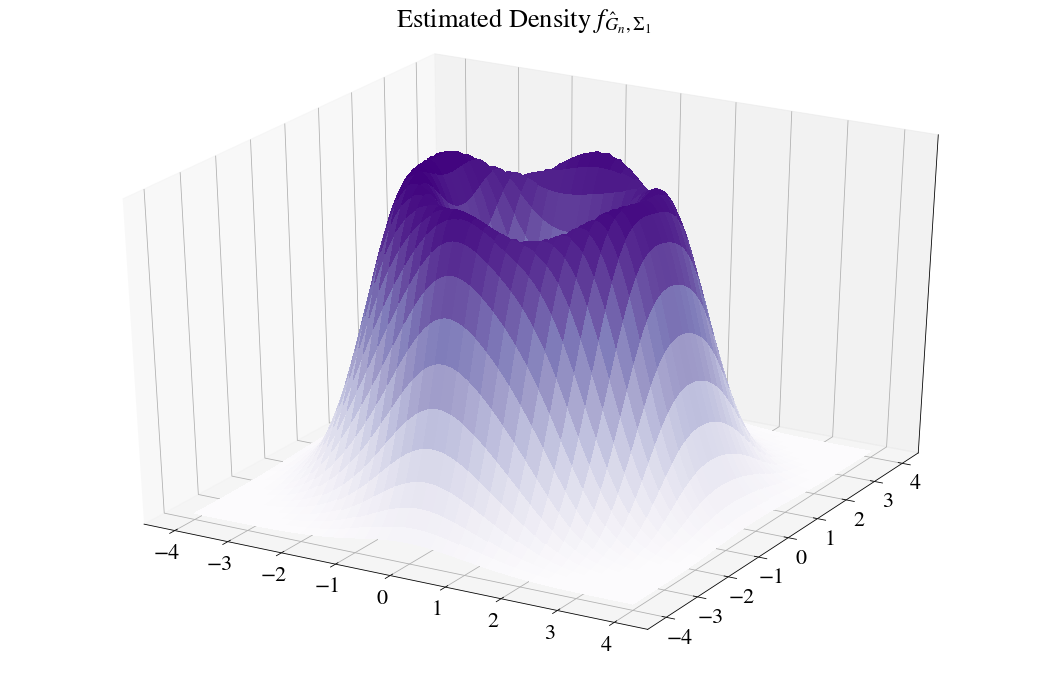

In [103]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure(figsize=(15,10))
ax = fig.gca(projection='3d')


# Plot the surface.
surf = ax.plot_surface(XX, YY, ZZ1, cmap='Purples',
                       linewidth=0, antialiased=False)

# Customize the z axis.
#ax.set_zlim(-.01, 0.5)

ax.set_zticks([])

# Add a color bar which maps values to colors.
#fig.colorbar(surf, shrink=0.5, aspect=5)

ax.set_title('Estimated Density $f_{\\hat{G}_n, \\Sigma_1}$\n')
#ax.set_title('True Density $f_{G^*, \\Sigma_1}$\n')


plt.tight_layout()
plt.savefig('estimated_density3d_1.png')
#plt.savefig('true_density3d_1.png')
plt.show()


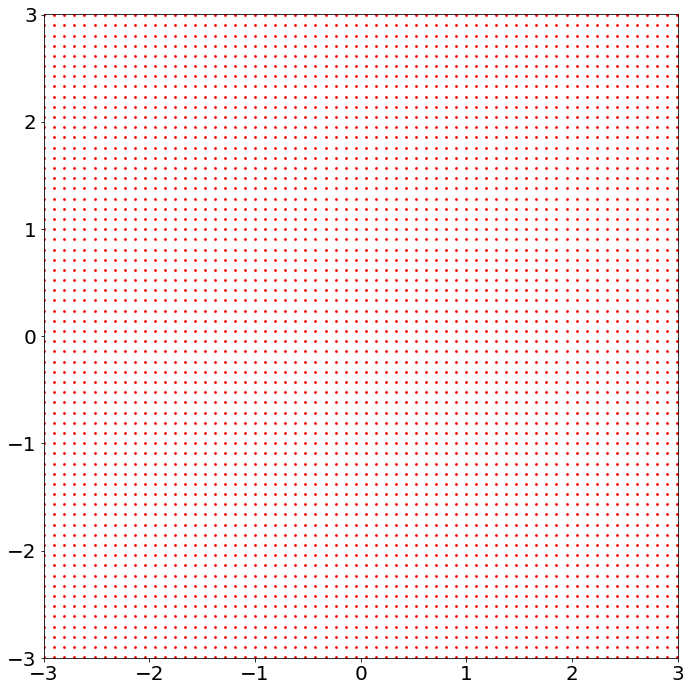

In [14]:
plt.figure(figsize=(10,10))
plt.rcParams.update({'font.size':20})
#plt.scatter(truth[:, 0], truth[:, 1], s=3, c='k')
plt.scatter(atoms[:, 0], atoms[:, 1], s=3, c='r')
#plt.legend(['Prior $G^*$', 'NPMLE $\\widehat{G}_n$'], loc="upper left")
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.tight_layout()
plt.savefig('grid-init.png', dpi=300)
plt.show()

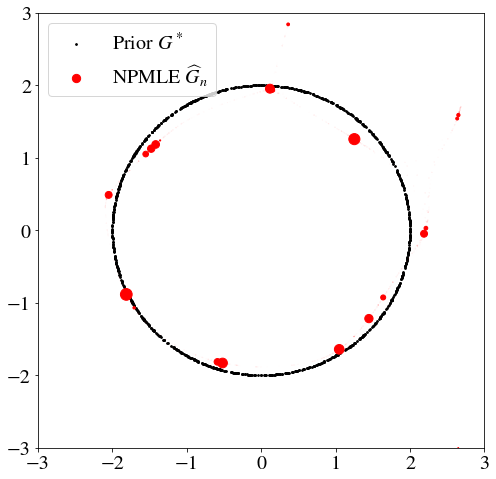

In [194]:
plt.figure(figsize=(8,8))
plt.rcParams.update({'font.size':20})
plt.scatter(truth[:, 0], truth[:, 1], s=3, c='k')
plt.scatter(m.atoms[:, 0], m.atoms[:, 1], s=m.weights*1000, c='r')
plt.legend(['Prior $G^*$', 'NPMLE $\\widehat{G}_n$'], loc="upper left")
plt.xlim([-3, 3])
plt.ylim([-3, 3])
#plt.savefig('Deconvolution.png')
plt.show()

In [48]:
cut = (np.abs(m.atoms[:, 0]) > 2.5) | (np.abs(m.atoms[:, 1]) > 2.5)

In [53]:
m2 = GLMixture(prec_type='diagonal')
m2.set_params(m.atoms, m.weights*(1-cut) / (sum(m.weights*(1-cut))))

In [54]:
m.score(X, prec) > m2.score(X, prec)

True

array([1.81408232, 1.44313857])

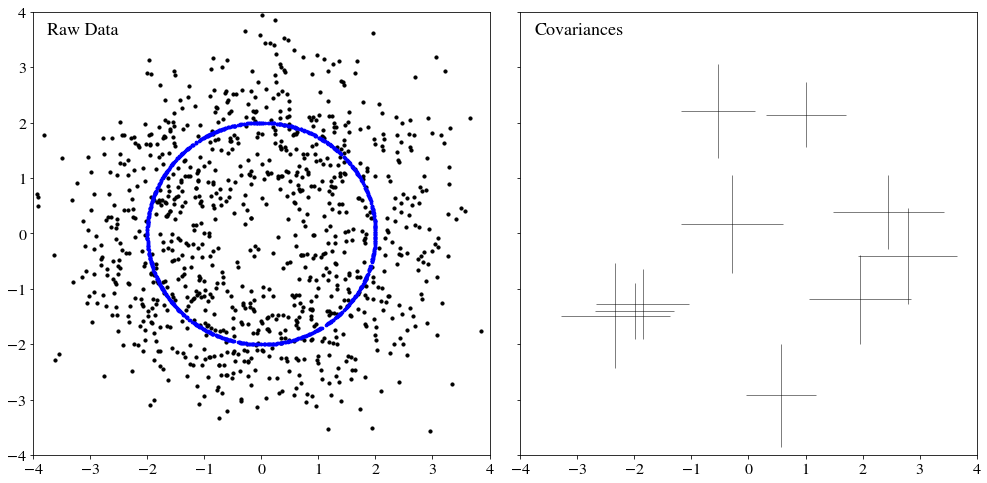

In [214]:
plt.rcParams.update({'font.size': 16})


fig, ax = plt.subplots(1,2, sharex=True, sharey=True, figsize=(14,7))

ax[0].scatter(X[:, 0], X[:, 1], s=10, alpha=1.,color='black')
ax[0].scatter(truth[:, 0], truth[:, 1], s=7, alpha=1.,color='blue')
ax[0].set_ylim(-4,4)
ax[0].set_xlim(-4,4)

np.random.seed(123)
inds = np.random.choice(n, 10, replace=False)
ax[1].errorbar(X[inds, 0], 
               X[inds, 1], 
               xerr=covs[inds, 0], 
               yerr=covs[inds, 1],
               alpha=.5, color='black', fmt='none', linewidth=1)

ax[0].text(-3.75, 3.6, r'Raw Data', fontsize=18)
ax[1].text(-3.75, 3.6, r'Covariances', fontsize=18)

plt.tight_layout()

plt.savefig('obs_true.png', dpi=100)

plt.show()

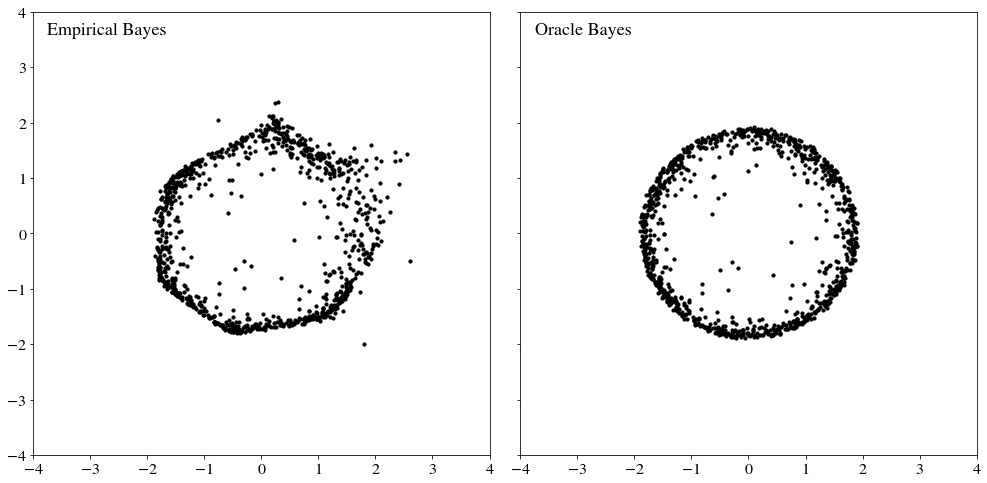

In [215]:
plt.rcParams.update({'font.size': 16})


fig, ax = plt.subplots(1,2, sharex=True, sharey=True, figsize=(14,7))

ax[0].scatter(gmleb[:, 0], gmleb[:, 1], s=10, alpha=1.,color='black')
ax[0].set_ylim(-4,4)
ax[0].set_xlim(-4,4)

ax[1].scatter(obayes[:, 0], obayes[:, 1], s=10, alpha=1.,color='black')
ax[1].set_ylim(-4,4)
ax[1].set_xlim(-4,4)

ax[0].text(-3.75, 3.6, r'Empirical Bayes', fontsize=18)
ax[1].text(-3.75, 3.6, r'Oracle Bayes', fontsize=18)

plt.tight_layout()

plt.savefig('denoised.png', dpi=100)

plt.show()

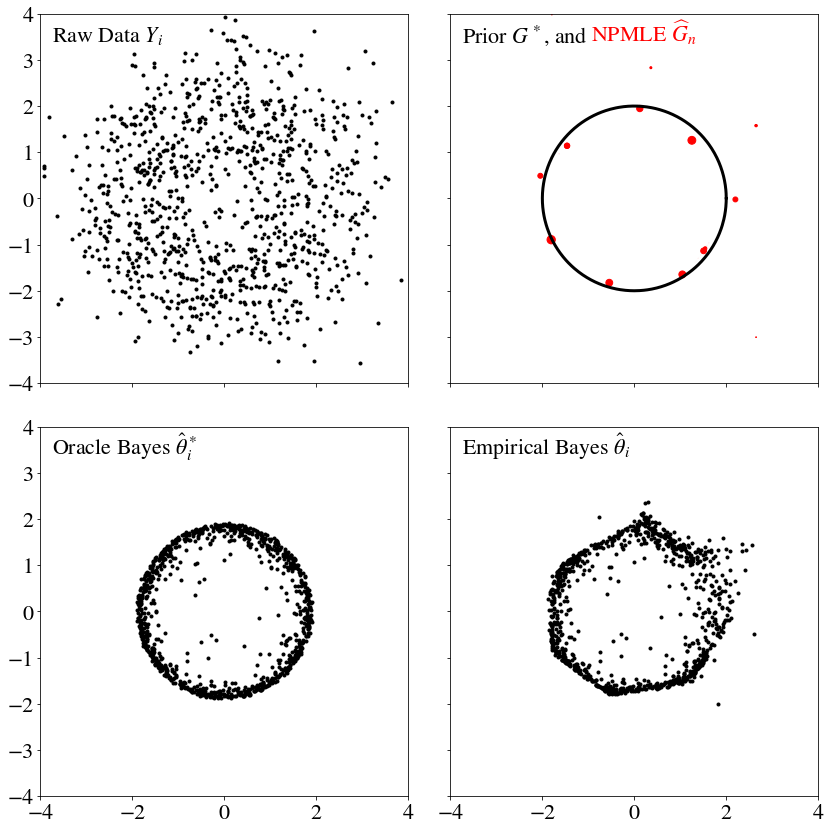

In [66]:
plt.rcParams.update({'font.size': 22,
                     'mathtext.fontset': 'stix',
                     'font.family': 'STIXGeneral'})
fig, ax = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(12,12))

ax[0,0].plot(X[:,0], X[:,1], 'k.')
ax[0,1].plot(truth[np.argsort(ang),0], truth[np.argsort(ang),1], 'k-', linewidth=3)
ax[0,1].scatter(m.atoms[:, 0], m.atoms[:, 1], s=m.weights*500, c='r')

ax[1,0].plot(obayes[:,0], obayes[:,1], 'k.')
ax[1,1].plot(gmleb[:,0], gmleb[:,1], 'k.')

M = 4
plt.xlim([-M, M])
plt.ylim([-M, M])

# ax[0,0].set_title('True Signal')
# ax[0,1].set_title('Raw Data')
# ax[1,0].set_title('Oracle Bayes')
# ax[1,1].set_title('Empirical Bayes')



ax[0,1].text(-3.75, 3.4, 'Prior $G^*$, and')
ax[0,1].text(-.95, 3.4, 'NPMLE $\\widehat{G}_n$', c='r')
ax[0,0].text(-3.75, 3.4, 'Raw Data $Y_i$')
ax[1,0].text(-3.75, 3.4, 'Oracle Bayes $\\hat\\theta^*_i$')
ax[1,1].text(-3.75, 3.4, 'Empirical Bayes $\\hat\\theta_i$')

plt.tight_layout()
plt.savefig('circle_demo2.png', dpi=200)
plt.show()

In [68]:
np.mean(np.sum((gmleb-obayes)**2, axis=1)), np.mean(np.sum((obayes-truth)**2, axis=1)), np.mean(np.sum((gmleb-truth)**2, axis=1)), np.mean(np.sum((X-truth)**2, axis=1))

(0.027817043264756754,
 0.8449388703276008,
 0.8721972040736019,
 1.456170751407739)